In [148]:
import pandas as pd
import urllib.request, json 
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
from IPython.display import Markdown, display
import locale
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

locale.setlocale(locale.LC_ALL, 'en_US')

def printmd(string):
    display(Markdown(string))

def getlatest(df, column):
    latest_date = df.max()['data']
    latest_but_one_date = df[df['data'] != latest_date].max()['data']

    latest_value = df[df['data'] == latest_date][column].values[0]
    latest_but_one_value = df[df['data'] == latest_but_one_date][column].values[0]
    sign_char = ""
    if latest_value >= latest_but_one_value:
        sign_char = "+"
    if latest_but_one_value == 0:
        incr_perc = "--"
    else:
        incr_perc = "{}{:.2f}%".format(sign_char, 100*(latest_value-latest_but_one_value)/latest_but_one_value)
    return "{} [{}]".format(locale.format_string("%d", latest_value, grouping=True), incr_perc)

NAT_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
NAT_TXT_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

with urllib.request.urlopen(NAT_JSON_URL) as url:
	data = json.loads(url.read().decode())

df = pd.DataFrame.from_dict(data)

summary_dict = {'totale_casi': "Totale casi", 
                'totale_attualmente_positivi': "Totale attualmente positivi",
               'nuovi_attualmente_positivi': "Nuovi attualmente positivi",
               'deceduti': "Deceduti",
               'terapia_intensiva': "Terapia Intensiva",
               'ricoverati_con_sintomi': "Ricoverati con sintomi",
               'totale_ospedalizzati': "Totale ospedalizzati",
               'isolamento_domiciliare': "Isolamente domiciliare",
               'dimessi_guariti': "Dimessi guariti",
               'tamponi': "Tamponi"}

latest_date = df.max()['data']
printmd("<span style='color:black;font-weight:bold;font-size:18px;'>DATI NAZIONALI </span><BR>")
printmd("<span style='color:black;font-weight:bold;font-size:18px;'>Aggiornamento: </span><span style='color:blue;font-weight:bold;font-size:18px'>{}</span>".format(latest_date))
for key in summary_dict:
    printmd("<span style='color:black;font-weight:bold;font-size:16px'>{}:  </span><span style='color:blue;font-weight:bold;font-size:16px'>{}</span>".format(summary_dict[key], getlatest(df, key)))

printmd("<HR>")


<span style='color:black;font-weight:bold;font-size:18px;'>DATI NAZIONALI </span><BR>

<span style='color:black;font-weight:bold;font-size:18px;'>Aggiornamento: </span><span style='color:blue;font-weight:bold;font-size:18px'>2020-03-20 17:00:00</span>

<span style='color:black;font-weight:bold;font-size:16px'>Totale casi:  </span><span style='color:blue;font-weight:bold;font-size:16px'>47,021 [+14.59%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Totale attualmente positivi:  </span><span style='color:blue;font-weight:bold;font-size:16px'>37,860 [+14.07%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Nuovi attualmente positivi:  </span><span style='color:blue;font-weight:bold;font-size:16px'>4,670 [+4.24%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Deceduti:  </span><span style='color:blue;font-weight:bold;font-size:16px'>4,032 [+18.41%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Terapia Intensiva:  </span><span style='color:blue;font-weight:bold;font-size:16px'>2,655 [+6.29%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Ricoverati con sintomi:  </span><span style='color:blue;font-weight:bold;font-size:16px'>16,020 [+1.67%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Totale ospedalizzati:  </span><span style='color:blue;font-weight:bold;font-size:16px'>18,675 [+2.30%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Isolamente domiciliare:  </span><span style='color:blue;font-weight:bold;font-size:16px'>19,185 [+28.46%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Dimessi guariti:  </span><span style='color:blue;font-weight:bold;font-size:16px'>5,129 [+15.52%]</span>

<span style='color:black;font-weight:bold;font-size:16px'>Tamponi:  </span><span style='color:blue;font-weight:bold;font-size:16px'>206,886 [+13.19%]</span>

<HR>

In [149]:
# data staging
df2 = df['deceduti']
nuovi_deceduti = df2.diff(periods=1);
nuovi_deceduti[0]=0

myDates = [datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in df['data']]

myValues_TAP_TD = [int(x)+int(y) for x,y in zip(df['totale_attualmente_positivi'], df['deceduti'])]
myValues_TAP = [int(x) for x in df['totale_attualmente_positivi']]

myValues_NAP_ND = [int(x)+int(y) for x,y in zip(df['nuovi_attualmente_positivi'], nuovi_deceduti)]
myValues_NAP = [int(x) for x in df['nuovi_attualmente_positivi']]

In [150]:
r0_NAP = []
for idx, value in enumerate(myValues_NAP):
    if idx == 0:
        r0_NAP.append(myValues_NAP[1] / myValues_NAP[0])
    else:
        r0_NAP.append(value / myValues_NAP[idx-1])

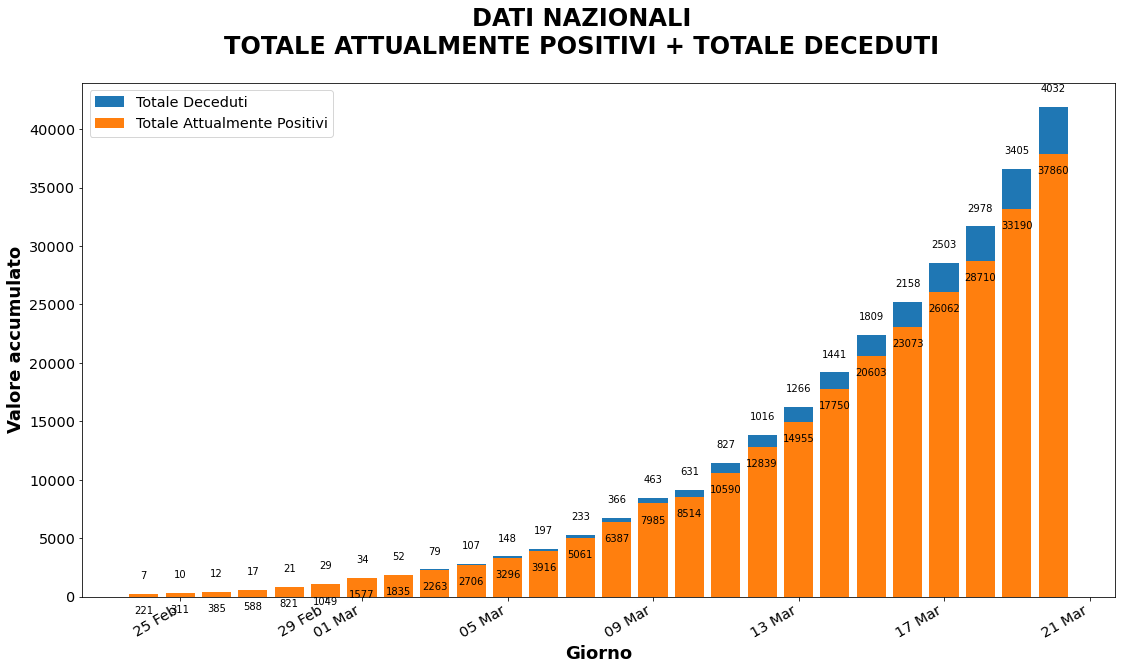

<HR>

In [151]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('DATI NAZIONALI\nTOTALE ATTUALMENTE POSITIVI + TOTALE DECEDUTI', fontsize=24, fontweight='bold')
ax.set_xlabel('Giorno', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('Valore accumulato', fontsize=18, fontweight='bold')

# first series
ax.bar(myDates, myValues_TAP_TD, label="Totale Deceduti")
# second series
ax.bar(myDates, myValues_TAP, label="Totale Attualmente Positivi")

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()


# zip joins x and y coordinates in pairs
for x,y,z in zip(myDates, myValues_TAP_TD, myValues_TAP):

    label = "{:.0f}".format(y-z)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# zip joins x and y coordinates in pairs
for x,y in zip(myDates, myValues_TAP):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.legend()


plt.show()
printmd("<HR>")


In [135]:
def null():
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle('Nuovi attualmente positivi + Nuovi deceduti', fontsize=24, fontweight='bold')
    ax.set_xlabel('Giorno', horizontalalignment='center', fontsize=18, fontweight='bold')
    ax.set_ylabel('Valore Incrementale', fontsize=18, fontweight='bold')

    ax.plot(myDates, myValues_NAP_ND,'ro-', label="Nuovi Attualmente Positivi + Nuovi Deceduti")

    myFmt = DateFormatter("%d %b")
    ax.xaxis.set_major_formatter(myFmt)

    ## Rotate date labels automatically
    fig.autofmt_xdate()

    # zip joins x and y coordinates in pairs
    for x,y in zip(myDates, myValues_NAP_ND):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,15), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    # second series
    ax.plot(myDates, df['nuovi_attualmente_positivi'], "co-", label="Nuovi Attualmente Positivi")
    # zip joins x and y coordinates in pairs
    for x,y in zip(myDates, myValues_NAP):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-20), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    ax.legend()

    plt.show()
    printmd("<HR>")

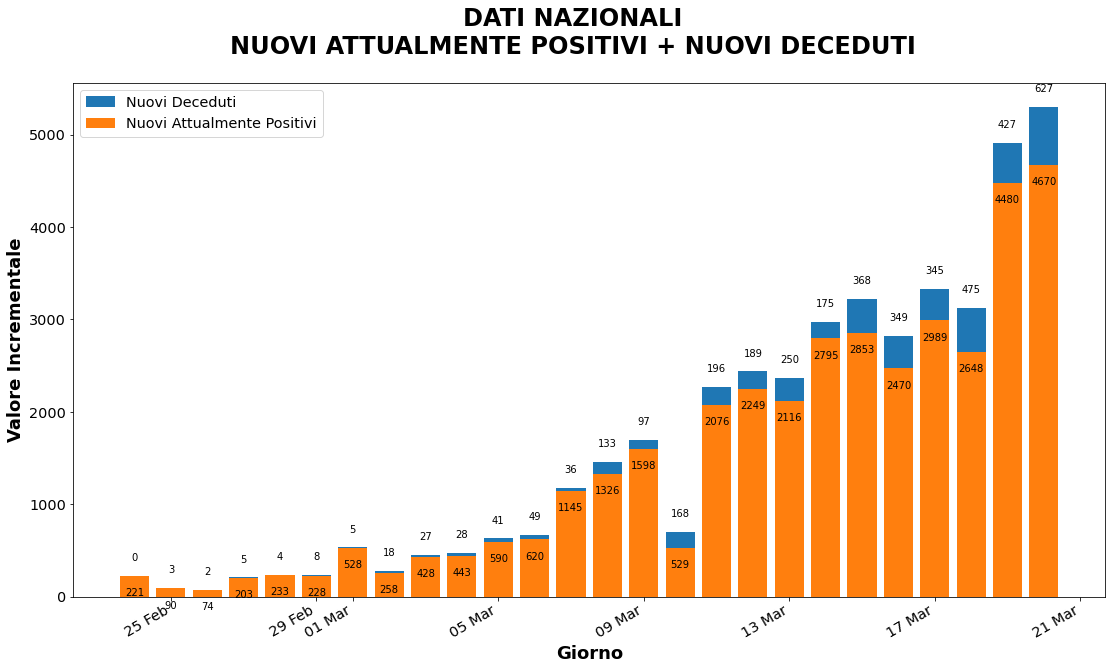

<HR>

In [152]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('DATI NAZIONALI\nNUOVI ATTUALMENTE POSITIVI + NUOVI DECEDUTI', fontsize=24, fontweight='bold')
ax.set_xlabel('Giorno', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('Valore Incrementale', fontsize=18, fontweight='bold')

# first series
ax.bar(myDates, myValues_NAP_ND, label="Nuovi Deceduti")
# second series
ax.bar(myDates, myValues_NAP, label="Nuovi Attualmente Positivi")

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

# zip joins x and y coordinates in pairs
for x,y,z in zip(myDates, myValues_NAP_ND, myValues_NAP):

    label = "{:.0f}".format(y-z)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# zip joins x and y coordinates in pairs
for x,y in zip(myDates, myValues_NAP):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.legend()

plt.show()

printmd("<HR>")


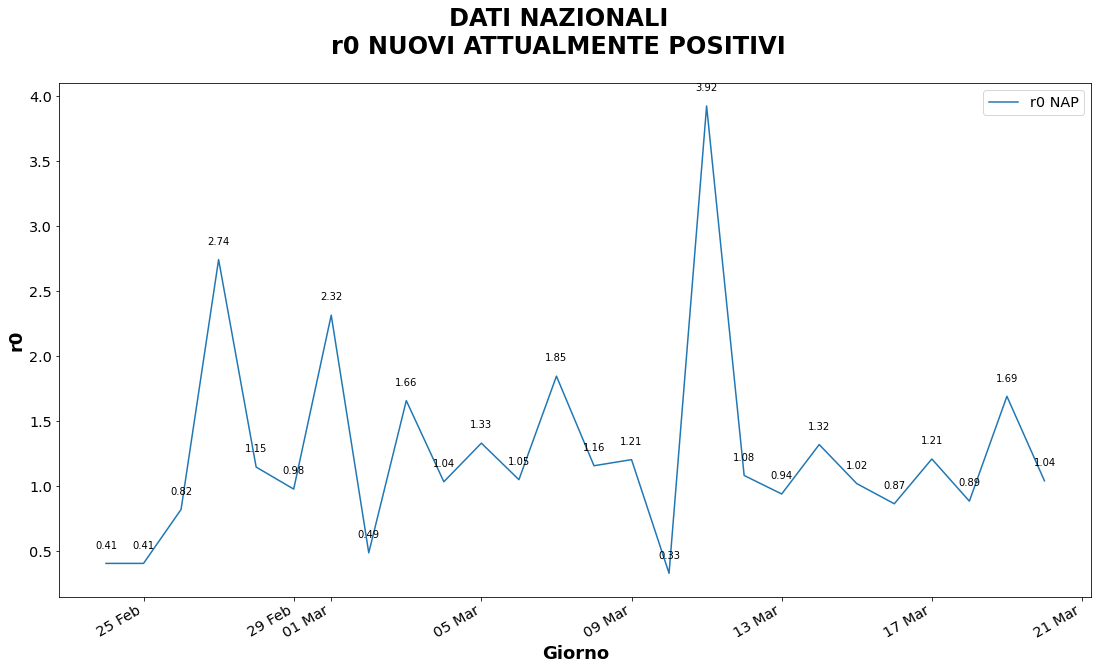

<HR>

In [154]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('DATI NAZIONALI\nr0 NUOVI ATTUALMENTE POSITIVI', fontsize=24, fontweight='bold')
ax.set_xlabel('Giorno', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('r0', fontsize=18, fontweight='bold')

ax.plot(myDates, r0_NAP, label="r0 NAP")

for x,y in zip(myDates, r0_NAP):
    if y is None:
        label = ""
    else:
        label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

ax.legend()

plt.show()
printmd("<HR>")

In [138]:
# regional data staging
REG_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json"

with urllib.request.urlopen(REG_JSON_URL) as url:
	data_reg = json.loads(url.read().decode())

df_reg = pd.DataFrame.from_dict(data_reg)

latest_date = df_reg.max()['data']
latest_but_one_date = df_reg[df_reg['data'] != latest_date].max()['data']

df_reg_latest = df_reg[df_reg['data'] == latest_date]
df_reg_latest_but_one = df_reg[df_reg['data'] == latest_but_one_date]

myRegions = [regione for regione in df_reg_latest['denominazione_regione']]
myValues_NAP_ND = [int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["nuovi_attualmente_positivi"]) + int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["deceduti"]) - int(df_reg_latest_but_one[df_reg_latest_but_one['denominazione_regione'] == regione]["deceduti"]) for regione in df_reg_latest['denominazione_regione']]
myValues_NAP = [int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["nuovi_attualmente_positivi"]) for regione in df_reg_latest['denominazione_regione']]
myValues_TAP_TD = [int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["totale_attualmente_positivi"]) + int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["deceduti"]) for regione in df_reg_latest['denominazione_regione']]
myValues_TAP = [int(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["totale_attualmente_positivi"]) for regione in df_reg_latest['denominazione_regione']]
r0_NAP = [float(df_reg_latest[df_reg_latest['denominazione_regione'] == regione]["nuovi_attualmente_positivi"])/float(df_reg_latest_but_one[df_reg_latest_but_one['denominazione_regione'] == regione]["nuovi_attualmente_positivi"]) for regione in df_reg_latest['denominazione_regione']]

myValues_NAP_ND_sorted = sorted(myValues_NAP_ND, reverse=True)
myValues_NAP_sorted = [x for _,x in sorted(zip(myValues_NAP_ND,myValues_NAP), reverse=True)]
myRegions_N_sorted = [x for _,x in sorted(zip(myValues_NAP_ND,myRegions), reverse=True)]

myValues_TAP_TD_sorted = sorted(myValues_TAP_TD, reverse=True)
myValues_TAP_sorted = [x for _,x in sorted(zip(myValues_TAP_TD,myValues_TAP), reverse=True)]
myRegions_T_sorted = [x for _,x in sorted(zip(myValues_TAP_TD,myRegions), reverse=True)]

r0_NAP_sorted = sorted(r0_NAP, reverse=True)
myRegions_r0_sorted = [x for _,x in sorted(zip(r0_NAP,myRegions), reverse=True)]

In [155]:
printmd("<span style='color:black;font-weight:bold;font-size:18px;'>DATI REGIONALI</span><BR>")
dropdown_region = widgets.Dropdown(options = myRegions_T_sorted)

output_region = widgets.Output()


@output_region.capture()
def dropdown_region_eventhandler(change):
    regione = change.new
    #regione = myRegions_T_sorted[change.new['index']]

    print("Regione: {}".format(regione))
    output_region.clear_output()

    summary_dict = {'totale_casi': "Totale casi", 
                    'totale_attualmente_positivi': "Totale attualmente positivi",
                   'nuovi_attualmente_positivi': "Nuovi attualmente positivi",
                   'deceduti': "Deceduti",
                   'terapia_intensiva': "Terapia Intensiva",
                   'ricoverati_con_sintomi': "Ricoverati con sintomi",
                   'totale_ospedalizzati': "Totale ospedalizzati",
                   'isolamento_domiciliare': "Isolamente domiciliare",
                   'dimessi_guariti': "Dimessi guariti",
                   'tamponi': "Tamponi"}

    printmd("<span style='color:black;font-weight:bold;font-size:18px;'>{}: </span><span style='color:blue;font-weight:bold;font-size:18px'>{}</span>".format(regione, latest_date))
    for key in summary_dict:
        update_string = getlatest(df_reg[df_reg['denominazione_regione'] == regione], key)
        printmd("<span style='color:black;font-weight:bold;font-size:16px'>{}:  </span><span style='color:blue;font-weight:bold;font-size:16px'>{}</span>".format(summary_dict[key], update_string))

    
dropdown_region.observe(dropdown_region_eventhandler, names = 'value')

display(dropdown_region)
display(output_region)
class Obj(object): 
    new = None
o = Obj()
setattr(o, 'new', myRegions_T_sorted[0])
dropdown_region_eventhandler(o)
printmd("<HR>")



<span style='color:black;font-weight:bold;font-size:18px;'>DATI REGIONALI</span><BR>

Dropdown(options=('Lombardia', 'Emilia Romagna', 'Veneto', 'Piemonte', 'Marche', 'Toscana', 'Liguria', 'Lazio'…

Output()

<HR>

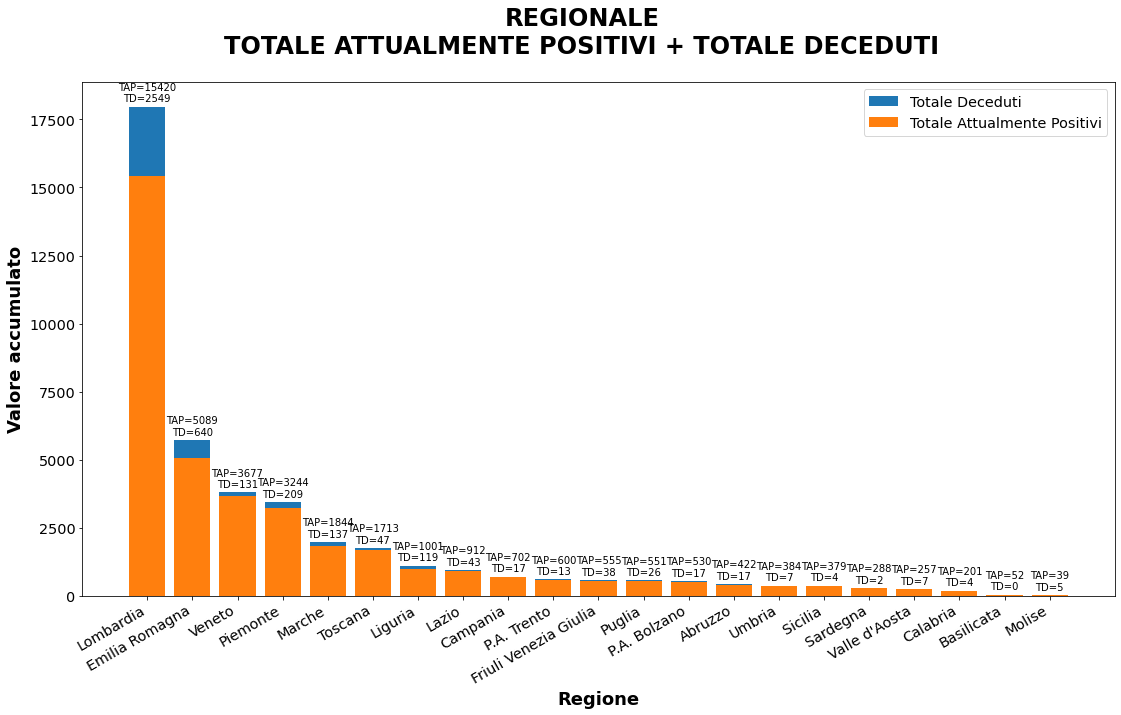

<HR>

In [140]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('REGIONALE\nTOTALE ATTUALMENTE POSITIVI + TOTALE DECEDUTI', fontsize=24, fontweight='bold')
ax.set_xlabel('Regione', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('Valore accumulato', fontsize=18, fontweight='bold')

# first series
ax.bar(myRegions_T_sorted, myValues_TAP_TD_sorted, label="Totale Deceduti")
# second series
ax.bar(myRegions_T_sorted, myValues_TAP_sorted, label="Totale Attualmente Positivi")

## Rotate date labels automatically
fig.autofmt_xdate()

for idx, region in enumerate(myRegions_T_sorted):
    
    height_2 = myValues_TAP_TD_sorted[idx]
    label_2 = "TAP=" + str(myValues_TAP_sorted[idx]) + "\nTD=" + str(myValues_TAP_TD_sorted[idx] - myValues_TAP_sorted[idx])
    ax.annotate(label_2,
        (idx, height_2),
        xytext=(0, 5), 
        textcoords='offset points',
        ha='center')

ax.legend()
plt.show()
printmd("<HR>")

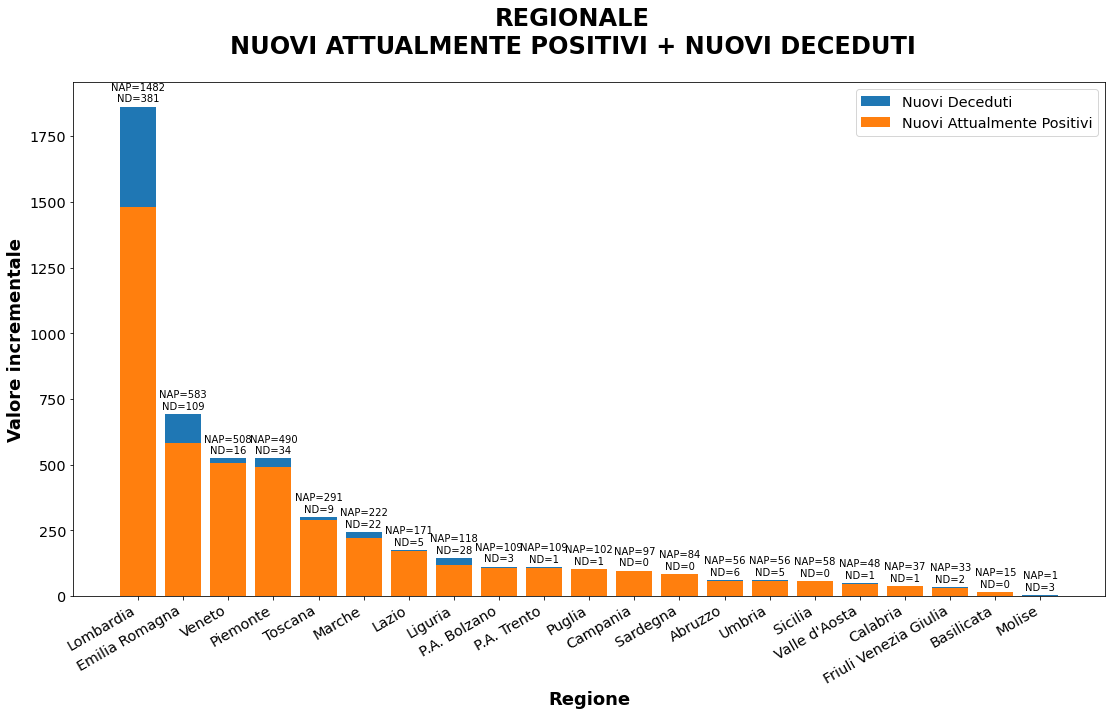

<HR>

In [141]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('REGIONALE\nNUOVI ATTUALMENTE POSITIVI + NUOVI DECEDUTI', fontsize=24, fontweight='bold')
ax.set_xlabel('Regione', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('Valore incrementale', fontsize=18, fontweight='bold')

# first series
ax.bar(myRegions_N_sorted, myValues_NAP_ND_sorted, label="Nuovi Deceduti")
# second series
ax.bar(myRegions_N_sorted, myValues_NAP_sorted, label="Nuovi Attualmente Positivi")

## Rotate date labels automatically
fig.autofmt_xdate()

for idx, region in enumerate(myRegions_N_sorted):
    height_2 = myValues_NAP_ND_sorted[idx]
    label_2 = "NAP=" + str(myValues_NAP_sorted[idx]) + "\nND=" + str(myValues_NAP_ND_sorted[idx] - myValues_NAP_sorted[idx])
    ax.annotate(label_2,
        (idx, height_2),
        xytext=(0, 5), 
        textcoords='offset points',
        ha='center')

ax.legend()
plt.show()
printmd("<HR>")


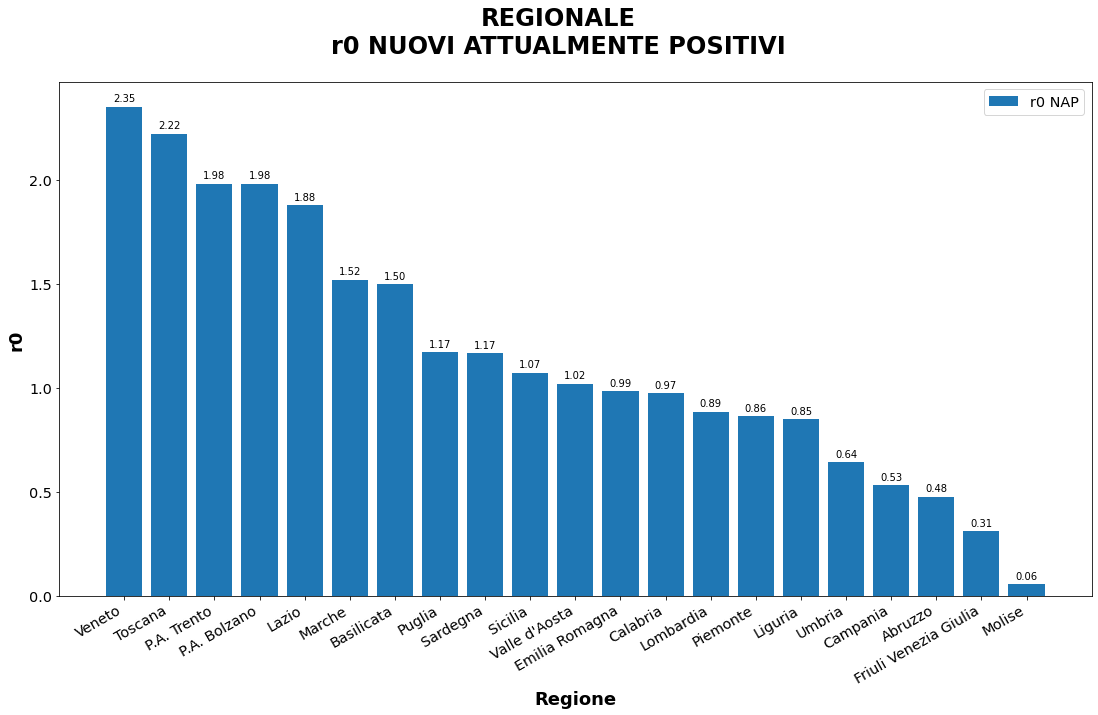

<HR>

In [142]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('REGIONALE\nr0 NUOVI ATTUALMENTE POSITIVI', fontsize=24, fontweight='bold')
ax.set_xlabel('Regione', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('r0', fontsize=18, fontweight='bold')

# first series
ax.bar(myRegions_r0_sorted, r0_NAP_sorted, label="r0 NAP")

## Rotate date labels automatically
fig.autofmt_xdate()

for idx, region in enumerate(myRegions_r0_sorted):
    height = r0_NAP_sorted[idx]
    label = "{:.2f}".format(r0_NAP_sorted[idx])
    ax.annotate(label,
        (idx, height),
        xytext=(0, 5), 
        textcoords='offset points',
        ha='center')

ax.legend()
plt.show()
printmd("<HR>")

In [143]:
# provincial data staging
PROV_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json"

with urllib.request.urlopen(PROV_JSON_URL) as url:
	data_prov = json.loads(url.read().decode())

df_prov = pd.DataFrame.from_dict(data_prov)


Provinces = ["Milano", "Bergamo", "Brescia", "Lodi", "Mantova"]


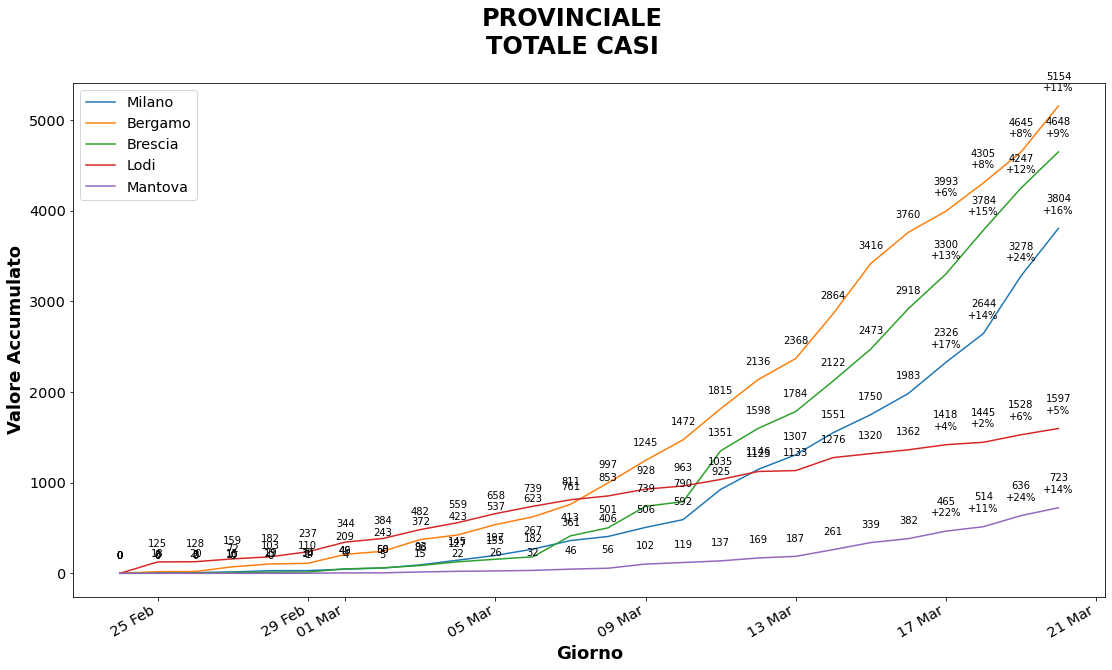

<HR>

In [144]:
fig, ax = plt.subplots()
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large', 'legend.fontsize': 'x-large'})
fig.set_size_inches(18.5, 10.5)
fig.suptitle('PROVINCIALE\nTOTALE CASI', fontsize=24, fontweight='bold')
ax.set_xlabel('Giorno', horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_ylabel('Valore Accumulato', fontsize=18, fontweight='bold')

for provincia in Provinces:
    myDates = [datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in df_prov[df_prov['denominazione_provincia'] == provincia]['data']]
    myValues = df_prov[df_prov['denominazione_provincia'] == provincia]["totale_casi"].values
    ax.plot(myDates, myValues, label=provincia)
    for idx,d in enumerate(myDates):
        x = myDates[idx]
        y = myValues[idx]
        if idx < len(myDates)-4:
            label = "{}".format(myValues[idx])
        else:
            label = "{}\n+{:.0f}%".format(myValues[idx], 100*(myValues[idx]-myValues[idx-1])/myValues[idx-1])

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,15), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

ax.legend()

plt.show()
printmd("<HR>")

In [145]:
timestamp = datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
printmd("<span style='color:black;font-size:12px'>Notebook generato il {}</span>".format(timestamp))

<span style='color:black;font-size:12px'>Notebook generato il 03/21/2020, 10:10:21</span>